In [4]:
import quandl
import yfinance as yf 
import datetime
import matplotlib.pyplot as plt 

#　1990までは値動きが小さいのでこうした。また、ICSAは1967以降しかない
start_date = '1990-01-01'
end_date = datetime.date.today()

api_key = 'a1rqWAeiZZ5xw_mcviUw'
quandl.ApiConfig.api_key = api_key

def quandlGetStEd(code):
    df = quandl.get(code,start_date=start_date, end_date=end_date)
    return df

In [5]:
SP500 = yf.download('^GSPC',start_date, end_date, interval='1d')
SP500.head()

# 金利
DFF = quandlGetStEd('FRED/DFF')
print(DFF.head())

# 雇用の申請数
ISCS = quandlGetStEd('FRED/ICSA')
print(ISCS.head())

# PER
SP500PER_MONTH = quandlGetStEd('MULTPL/SP500_PE_RATIO_MONTH')
print(SP500PER_MONTH.head())

[*********************100%***********************]  1 of 1 completed
            Value
Date             
1990-01-01   7.97
1990-01-02   8.54
1990-01-03   8.37
1990-01-04   8.29
1990-01-05   8.20
               Value
Date                
1990-01-06  355000.0
1990-01-13  369000.0
1990-01-20  375000.0
1990-01-27  345000.0
1990-02-03  368000.0
            Value
Date             
1990-01-01  15.13
1990-02-01  14.97
1990-03-01  15.62
1990-04-01  15.70
1990-05-01  16.37


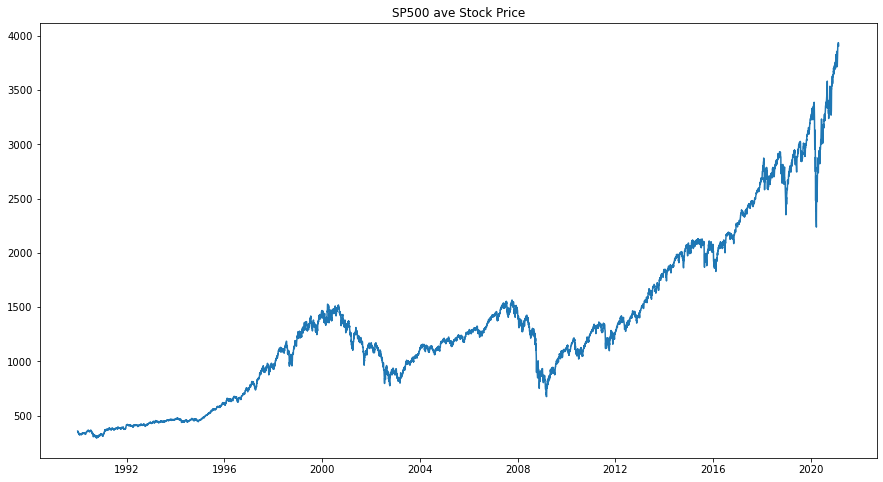

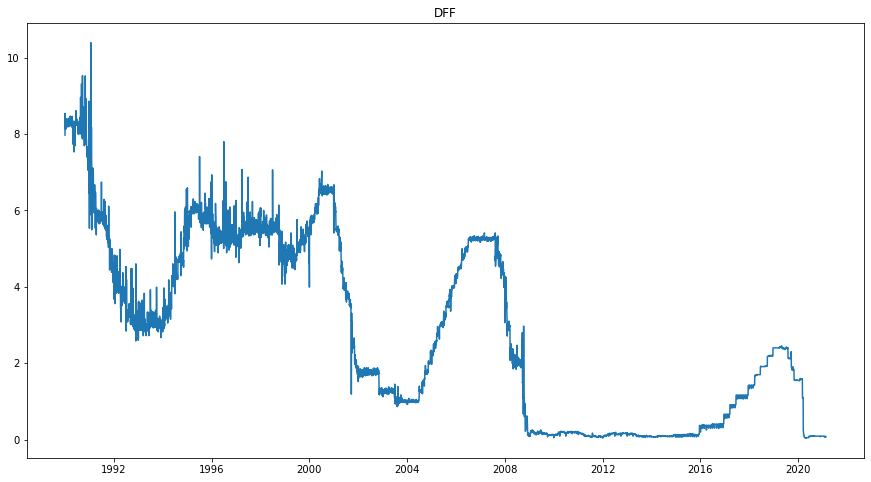

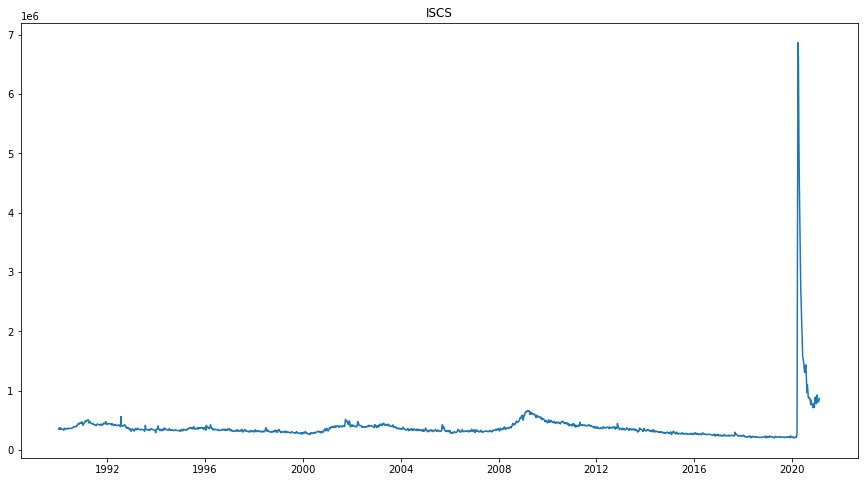

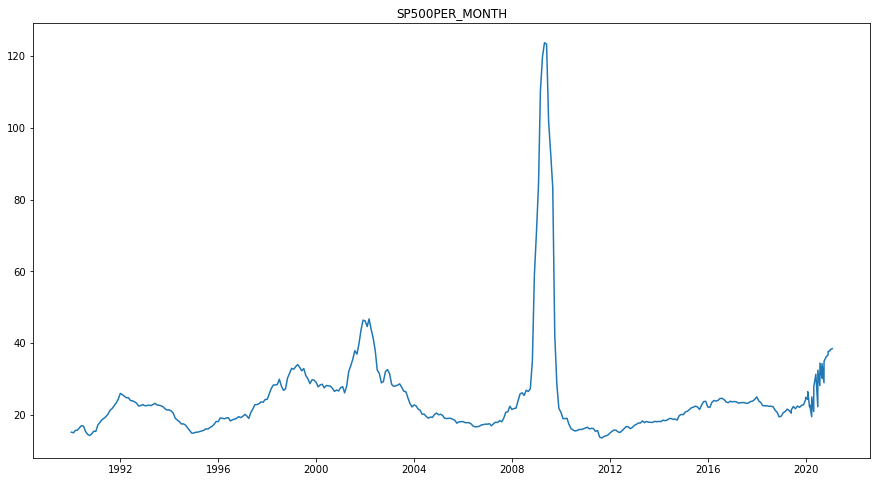

In [17]:
def plotAndSave(df,value,title):
    fig = plt.figure(figsize=(15.0,8.0))
    plt.plot(df.index, df[value])
    plt.title(title)
    plt.show()
    fig.savefig('./figures/'+title+'.png')

fig = plt.figure(figsize=(15.0,8.0))
plt.plot(SP500.index,SP500['Close'])
plt.title('SP500 ave Stock Price')
plt.show()
fig.savefig('./figures/sp500ave.png')

fig = plt.figure(figsize=(15.0,8.0))
plt.plot(DFF.index, DFF['Value'])
plt.title('DFF')
plt.show()
fig.savefig('./figures/DFF.png')

plotAndSave(ISCS,'Value','ISCS')
plotAndSave(SP500PER_MONTH,'Value','SP500PER_MONTH')
# plt.figure(figsize=(15.0,8.0))
# plt.plot(ISCS.index, ISCS['Value'])
# plt.title('ISCS')
# plt.show()

# plt.figure(figsize=(15.0,8.0))
# plt.plot(SP500PER_MONTH.index, SP500PER_MONTH['Value'])
# plt.title('SP500PER_MONTH')
# plt.show()